In [1]:
#Import the required libraries and dependencies.
import pandas as pd
from pathlib import Path
%matplotlib inline
# Import the NumPy library
import numpy as np
import csv
import questionary
import fire
import sys
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go

In [2]:
# Read in the CSV file called "AMC_.csv" using the Path module. 
# The CSV file is located in the Stock_Prices folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
AMC_df = pd.read_csv(
    Path('../csv_data/csv_files_stocks/AMC_csv_file.csv'), 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)

In [3]:
# Preview AMC_df file
AMC_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,2.15,2.46,2.02,2.41,2.41,11378000
2020-04-16,2.35,2.49,2.15,2.44,2.44,6290800
2020-04-17,3.85,3.85,3.05,3.20,3.20,26799900
2020-04-20,3.22,3.44,3.06,3.18,3.18,10787200
2020-04-21,3.20,3.38,3.15,3.25,3.25,5788400


In [4]:
# For the AMC_df, replace or drop all NaNs or missing values in the DataFrame
AMC_df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,2.150000,2.460000,2.020000,2.410000,2.410000,11378000
2020-04-16,2.350000,2.490000,2.150000,2.440000,2.440000,6290800
2020-04-17,3.850000,3.850000,3.050000,3.200000,3.200000,26799900
2020-04-20,3.220000,3.440000,3.060000,3.180000,3.180000,10787200
2020-04-21,3.200000,3.380000,3.150000,3.250000,3.250000,5788400
...,...,...,...,...,...,...
2021-12-23,28.860001,29.430000,26.820000,28.520000,28.520000,37005900
2021-12-27,28.350000,29.389999,27.010000,28.700001,28.700001,30785600
2021-12-28,28.180000,29.740000,27.590000,27.719999,27.719999,31588100


In [5]:
# Convert the Close data type to a float
AMC_df.loc[:,"Close"] = AMC_df.loc[:,"Close"].astype("float")
AMC_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
#Review the data for duplicated values, and drop them if necessary.
AMC_df.drop_duplicates()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,2.150000,2.460000,2.020000,2.410000,2.410000,11378000
2020-04-16,2.350000,2.490000,2.150000,2.440000,2.440000,6290800
2020-04-17,3.850000,3.850000,3.050000,3.200000,3.200000,26799900
2020-04-20,3.220000,3.440000,3.060000,3.180000,3.180000,10787200
2020-04-21,3.200000,3.380000,3.150000,3.250000,3.250000,5788400
...,...,...,...,...,...,...
2021-12-23,28.860001,29.430000,26.820000,28.520000,28.520000,37005900
2021-12-27,28.350000,29.389999,27.010000,28.700001,28.700001,30785600
2021-12-28,28.180000,29.740000,27.590000,27.719999,27.719999,31588100


In [7]:
# Use loc or iloc to select `Date (the index)` and `Close` from bitstamp DataFrame
AMC_sliced = AMC_df.iloc[:,[3]]
# Review the first 5 rows of DataFrame
AMC_sliced.head()

,Close
Date,
2020-04-15,2.41
2020-04-16,2.44
2020-04-17,3.20
2020-04-20,3.18
2020-04-21,3.25


In [8]:
# Reivew the last 5 rows 
AMC_sliced.tail()

,Close
Date,
2021-12-23,28.520000
2021-12-27,28.700001
2021-12-28,27.719999
2021-12-29,27.950001
2021-12-30,28.940001


In [9]:
# Rename colummn Close to AMC 
AMC_new = AMC_sliced.rename(columns={"Close":"AMC"})
# Display the result
AMC_new

,AMC
Date,
2020-04-15,2.410000
2020-04-16,2.440000
2020-04-17,3.200000
2020-04-20,3.180000
2020-04-21,3.250000
...,...
2021-12-23,28.520000
2021-12-27,28.700001
2021-12-28,27.719999


In [10]:
# Read in the CSV file called "GME_.csv" using the Path module. 
# The CSV file is located in the Stock_Prices folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
GME_df = pd.read_csv(
    Path('../csv_data/csv_files_stocks/GME_csv_file.csv'), 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)

In [11]:
GME_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,5.66,5.67,4.90,5.27,5.27,7499900
2020-04-16,5.12,5.44,4.88,5.03,5.03,3371900
2020-04-17,5.22,5.28,4.43,4.88,4.88,5653200
2020-04-20,4.85,5.90,4.78,5.61,5.61,6085000
2020-04-21,5.23,5.30,4.76,4.78,4.78,4142100


In [12]:
GME_df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,5.660000,5.670000,4.900000,5.270000,5.270000,7499900
2020-04-16,5.120000,5.440000,4.880000,5.030000,5.030000,3371900
2020-04-17,5.220000,5.280000,4.430000,4.880000,4.880000,5653200
2020-04-20,4.850000,5.900000,4.780000,5.610000,5.610000,6085000
2020-04-21,5.230000,5.300000,4.760000,4.780000,4.780000,4142100
...,...,...,...,...,...,...
2021-12-23,154.000000,155.000000,146.020004,152.139999,152.139999,1055500
2021-12-27,152.000000,152.619995,140.000000,148.309998,148.309998,1613600
2021-12-28,147.500000,157.410004,146.410004,146.460007,146.460007,1331100


In [13]:
# Convert the Close data type to a float
GME_df.loc[:,"Close"] = GME_df.loc[:,"Close"].astype("float")
GME_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [14]:
#Review the data for duplicated values, and drop them if necessary.
GME_df.drop_duplicates()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,5.660000,5.670000,4.900000,5.270000,5.270000,7499900
2020-04-16,5.120000,5.440000,4.880000,5.030000,5.030000,3371900
2020-04-17,5.220000,5.280000,4.430000,4.880000,4.880000,5653200
2020-04-20,4.850000,5.900000,4.780000,5.610000,5.610000,6085000
2020-04-21,5.230000,5.300000,4.760000,4.780000,4.780000,4142100
...,...,...,...,...,...,...
2021-12-23,154.000000,155.000000,146.020004,152.139999,152.139999,1055500
2021-12-27,152.000000,152.619995,140.000000,148.309998,148.309998,1613600
2021-12-28,147.500000,157.410004,146.410004,146.460007,146.460007,1331100


In [15]:
# Use loc or iloc to select `Date (the index)` and `Close` from GME DataFrame
GME_sliced = GME_df.iloc[:,[3]]
# Review the first 5 rows of DataFrame
GME_sliced.head()

,Close
Date,
2020-04-15,5.27
2020-04-16,5.03
2020-04-17,4.88
2020-04-20,5.61
2020-04-21,4.78


In [16]:
# Review the last 5 rows of DataFrame
GME_sliced.tail()

,Close
Date,
2021-12-23,152.139999
2021-12-27,148.309998
2021-12-28,146.460007
2021-12-29,153.929993
2021-12-30,155.330002


In [17]:
# Rename colummn Close to AMC 
GME_new = GME_sliced.rename(columns={"Close":"GME"})
# Display the result
GME_new

,GME
Date,
2020-04-15,5.270000
2020-04-16,5.030000
2020-04-17,4.880000
2020-04-20,5.610000
2020-04-21,4.780000
...,...
2021-12-23,152.139999
2021-12-27,148.309998
2021-12-28,146.460007


In [18]:
# Using concat function to merge AMC and GME into one DataFrame
result = pd.concat([AMC_new,GME_new], axis = 1)
result


,AMC,GME
Date,,
2020-04-15,2.410000,5.270000
2020-04-16,2.440000,5.030000
2020-04-17,3.200000,4.880000
2020-04-20,3.180000,5.610000
2020-04-21,3.250000,4.780000
...,...,...
2021-12-23,28.520000,152.139999
2021-12-27,28.700001,148.309998
2021-12-28,27.719999,146.460007


In [19]:
# Read in the CSV file called "MSTR_csv" using the Path module. 
# The CSV file is located in the Stock_Prices folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
MSTR_df = pd.read_csv(
    Path('../csv_data/csv_files_stocks/MSTR_csv_file.csv'), 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)

In [20]:
# Review the MSTR_df
MSTR_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,121.620003,124.900002,120.489998,122.599998,122.599998,59800
2020-04-16,122.790001,125.459999,122.070000,124.129997,124.129997,59700
2020-04-17,127.230003,127.419998,125.449997,126.529999,126.529999,72000
2020-04-20,124.059998,127.360001,123.000000,126.919998,126.919998,46000
2020-04-21,124.059998,124.519997,121.660004,122.709999,122.709999,67800
...,...,...,...,...,...,...
2021-12-23,568.299988,600.000000,563.010010,597.210022,597.210022,545100
2021-12-27,600.000000,621.520020,598.400024,608.280029,608.280029,312200
2021-12-28,590.000000,590.229980,562.619995,567.969971,567.969971,345300


In [21]:
# Convert the Close data type to a float
MSTR_df.loc[:,"Close"] = MSTR_df.loc[:,"Close"].astype("float")
MSTR_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [22]:
# Use loc or iloc to select `Date (the index)` and `Close` from bitstamp DataFrame
MSTR_sliced = MSTR_df.iloc[:,[3]]
# Review the DataFrame
MSTR_sliced

,Close
Date,
2020-04-15,122.599998
2020-04-16,124.129997
2020-04-17,126.529999
2020-04-20,126.919998
2020-04-21,122.709999
...,...
2021-12-23,597.210022
2021-12-27,608.280029
2021-12-28,567.969971


In [23]:
# Rename colummn Close to MSTR
MSTR_new = MSTR_sliced.rename(columns={"Close":"MSTR"})
# Display the result
MSTR_new

,MSTR
Date,
2020-04-15,122.599998
2020-04-16,124.129997
2020-04-17,126.529999
2020-04-20,126.919998
2020-04-21,122.709999
...,...
2021-12-23,597.210022
2021-12-27,608.280029
2021-12-28,567.969971


In [24]:
# Using concat function to merge AMC,GME, MSTR into one DataFrame
result = pd.concat([AMC_new,GME_new, MSTR_new], axis = 1)
result

,AMC,GME,MSTR
Date,,,
2020-04-15,2.410000,5.270000,122.599998
2020-04-16,2.440000,5.030000,124.129997
2020-04-17,3.200000,4.880000,126.529999
2020-04-20,3.180000,5.610000,126.919998
2020-04-21,3.250000,4.780000,122.709999
...,...,...,...
2021-12-23,28.520000,152.139999,597.210022
2021-12-27,28.700001,148.309998,608.280029
2021-12-28,27.719999,146.460007,567.969971


In [25]:
# Read in the CSV file called "SPY_csv" using the Path module. 
# The CSV file is located in the Stock_Prices folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
SPY_df = pd.read_csv(
    Path('../csv_data/csv_files_stocks/SPY_csv_file.csv'), 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)

In [26]:
# Review the SPY_df
SPY_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-15,290.239990,290.350006,289.079987,289.970001,276.903595,49596700
2019-04-16,290.950012,291.010010,289.500000,290.160004,277.085052,52153200
2019-04-17,291.399994,291.429993,288.989990,289.450012,276.407043,58268300
2019-04-18,290.100006,290.320007,288.660004,290.019989,276.951355,68708500
2019-04-22,289.170013,290.440002,289.070007,290.269989,277.190063,40160100
...,...,...,...,...,...,...
2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700
2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600
2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600


In [27]:
# Convert the Close data type to a float
SPY_df.loc[:,"Close"] = SPY_df.loc[:,"Close"].astype("float")
SPY_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [28]:
# Use loc or iloc to select `Date (the index)` and `Close` from DataFrame
SPY_sliced = SPY_df.iloc[:,[3]]
# Review the DataFrame
SPY_sliced

,Close
Date,
2019-04-15,289.970001
2019-04-16,290.160004
2019-04-17,289.450012
2019-04-18,290.019989
2019-04-22,290.269989
...,...
2021-12-23,470.600006
2021-12-27,477.260010
2021-12-28,476.869995


In [29]:
# Rename colummn Close to SPY
SPY_new = SPY_sliced.rename(columns={"Close":"SPY"})
# Display the result
SPY_new

,SPY
Date,
2019-04-15,289.970001
2019-04-16,290.160004
2019-04-17,289.450012
2019-04-18,290.019989
2019-04-22,290.269989
...,...
2021-12-23,470.600006
2021-12-27,477.260010
2021-12-28,476.869995


In [30]:
# Using concat function to merge AMC,GME, MSTR, SPY into one DataFrame
result = pd.concat([AMC_new,GME_new, MSTR_new, SPY_new], axis = 1, join = 'inner')
result

,AMC,GME,MSTR,SPY
Date,,,,
2020-04-15,2.410000,5.270000,122.599998,277.760010
2020-04-16,2.440000,5.030000,124.129997,279.100006
2020-04-17,3.200000,4.880000,126.529999,286.640015
2020-04-20,3.180000,5.610000,126.919998,281.589996
2020-04-21,3.250000,4.780000,122.709999,273.040009
...,...,...,...,...
2021-12-23,28.520000,152.139999,597.210022,470.600006
2021-12-27,28.700001,148.309998,608.280029,477.260010
2021-12-28,27.719999,146.460007,567.969971,476.869995


In [31]:
# Read in the CSV file called "TSLA_csv" using the Path module. 
# The CSV file is located in the Stock_Prices folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
TSLA_df = pd.read_csv(
    Path('../csv_data/csv_files_stocks/TSLA_csv_file.csv'), 
    index_col="Date", 
    parse_dates=True, 
    infer_datetime_format=True)

In [32]:
# Review the TSLAdf
TSLA_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000
2020-04-20,146.539993,153.113998,142.442001,149.272003,149.272003,73733000
2020-04-21,146.024002,150.666000,134.757996,137.343994,137.343994,101045500
...,...,...,...,...,...,...
2021-12-23,1006.799988,1072.979980,997.559998,1067.000000,1067.000000,30904400
2021-12-27,1073.670044,1117.000000,1070.719971,1093.939941,1093.939941,23715300
2021-12-28,1109.489990,1119.000000,1078.420044,1088.469971,1088.469971,20108000


In [33]:
# Convert the Close data type to a float
TSLA_df.loc[:,"Close"] = TSLA_df.loc[:,"Close"].astype("float")
TSLA_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [34]:
# Use loc or iloc to select `Date (the index)` and `Close` from DataFrame
TSLA_sliced = TSLA_df.iloc[:,[3]]
# Review the DataFrame
TSLA_sliced

,Close
Date,
2020-04-15,145.966003
2020-04-16,149.042007
2020-04-17,150.778000
2020-04-20,149.272003
2020-04-21,137.343994
...,...
2021-12-23,1067.000000
2021-12-27,1093.939941
2021-12-28,1088.469971


In [35]:
# Rename colummn Close to TSLA
TSLA_new = TSLA_sliced.rename(columns={"Close":"TSLA"})
# Display the result
TSLA_new

,TSLA
Date,
2020-04-15,145.966003
2020-04-16,149.042007
2020-04-17,150.778000
2020-04-20,149.272003
2020-04-21,137.343994
...,...
2021-12-23,1067.000000
2021-12-27,1093.939941
2021-12-28,1088.469971


In [36]:
# Using concat function to merge AMC,GME, MSTR, SPY and TSLA into one DataFrame
result_df = pd.concat([AMC_new,GME_new, MSTR_new, SPY_new,TSLA_new], axis = 1, join = 'inner')
result_df

,AMC,GME,MSTR,SPY,TSLA
Date,,,,,
2020-04-15,2.410000,5.270000,122.599998,277.760010,145.966003
2020-04-16,2.440000,5.030000,124.129997,279.100006,149.042007
2020-04-17,3.200000,4.880000,126.529999,286.640015,150.778000
2020-04-20,3.180000,5.610000,126.919998,281.589996,149.272003
2020-04-21,3.250000,4.780000,122.709999,273.040009,137.343994
...,...,...,...,...,...
2021-12-23,28.520000,152.139999,597.210022,470.600006,1067.000000
2021-12-27,28.700001,148.309998,608.280029,477.260010,1093.939941
2021-12-28,27.719999,146.460007,567.969971,476.869995,1088.469971


In [37]:
# Check to see if all the data is in "float"
result_df.dtypes


AMC     float64
GME     float64
MSTR    float64
SPY     float64
TSLA    float64
dtype: object

In [38]:
# Calculate the daily returns each stocks in result_df DataFrame
stocks_daily_return = result_df.pct_change().dropna()
# Review 
stocks_daily_return


,AMC,GME,MSTR,SPY,TSLA
Date,,,,,
2020-04-16,0.012448,-0.045541,0.012480,0.004824,0.021073
2020-04-17,0.311475,-0.029821,0.019335,0.027015,0.011648
2020-04-20,-0.006250,0.149590,0.003082,-0.017618,-0.009988
2020-04-21,0.022013,-0.147950,-0.033170,-0.030363,-0.079908
2020-04-22,-0.021538,0.023013,0.018743,0.022195,0.066097
...,...,...,...,...,...
2021-12-23,-0.005579,-0.012078,0.047755,0.006222,0.057619
2021-12-27,0.006311,-0.025174,0.018536,0.014152,0.025248
2021-12-28,-0.034146,-0.012474,-0.066269,-0.000817,-0.005000


In [39]:
# Create a float input value for choosen stimulus amount
starting_value = float(input("Starting amount"))

Starting amount 1220


In [40]:
# Create a daily return for AMC in a new dataframe
AMC_daily_returns = AMC_new.pct_change()
# Review AMC daily returns
AMC_daily_returns




,AMC
Date,
2020-04-15,NaN
2020-04-16,0.012448
2020-04-17,0.311475
2020-04-20,-0.006250
2020-04-21,0.022013
...,...
2021-12-23,-0.005579
2021-12-27,0.006311
2021-12-28,-0.034146


In [41]:
# Add an empty "Portfolio" column for AMC_daily_returns in order
# to keep tracking the AMC cumulative return with types as NaT(represent missing value) DataFrame
AMC_daily_returns['Portfolio'] = pd.NaT
AMC_daily_returns

,AMC,Portfolio
Date,,
2020-04-15,NaN,NaT
2020-04-16,0.012448,NaT
2020-04-17,0.311475,NaT
2020-04-20,-0.006250,NaT
2020-04-21,0.022013,NaT
...,...,...
2021-12-23,-0.005579,NaT
2021-12-27,0.006311,NaT
2021-12-28,-0.034146,NaT


In [42]:
# Calculate the AMC cumulative value over time 
AMC_daily_returns = AMC_daily_returns.assign(Portfolio=(1+AMC_daily_returns['AMC'].fillna(0)).cumprod().mul(starting_value))

In [43]:
# Review 
AMC_daily_returns

,AMC,Portfolio
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,0.012448,1235.186722
2020-04-17,0.311475,1619.917012
2020-04-20,-0.006250,1609.792531
2020-04-21,0.022013,1645.228216
...,...,...
2021-12-23,-0.005579,14437.510373
2021-12-27,0.006311,14528.631212
2021-12-28,-0.034146,14032.530614


In [44]:
#Rename columns. 
AMC = AMC_daily_returns.rename(columns={'AMC':'AMC Daily Returns',"Portfolio":"AMC Port "})
# Review AMC Data Frame
AMC

,AMC Daily Returns,AMC Port
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,0.012448,1235.186722
2020-04-17,0.311475,1619.917012
2020-04-20,-0.006250,1609.792531
2020-04-21,0.022013,1645.228216
...,...,...
2021-12-23,-0.005579,14437.510373
2021-12-27,0.006311,14528.631212
2021-12-28,-0.034146,14032.530614


In [45]:
# Create a daily return for GME in a new dataframe
GME_daily_returns = GME_new.pct_change()
# Review AMC daily returns
GME_daily_returns


,GME
Date,
2020-04-15,NaN
2020-04-16,-0.045541
2020-04-17,-0.029821
2020-04-20,0.149590
2020-04-21,-0.147950
...,...
2021-12-23,-0.012078
2021-12-27,-0.025174
2021-12-28,-0.012474


In [46]:
# Add an empty "Portfolio" column for GME_daily_returns in order
# to keep tracking the AMC cumulative return with types as NaT(represent missing value) DataFrame
GME_daily_returns['Portfolio'] = pd.NaT
GME_daily_returns

,GME,Portfolio
Date,,
2020-04-15,NaN,NaT
2020-04-16,-0.045541,NaT
2020-04-17,-0.029821,NaT
2020-04-20,0.149590,NaT
2020-04-21,-0.147950,NaT
...,...,...
2021-12-23,-0.012078,NaT
2021-12-27,-0.025174,NaT
2021-12-28,-0.012474,NaT


In [47]:
# Calculate the GME cumulative value over time 
GME_daily_returns = GME_daily_returns.assign(Portfolio=(1+GME_daily_returns['GME'].fillna(0)).cumprod().mul(starting_value))
# Review GME_daily_returns
GME_daily_returns 

,GME,Portfolio
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,-0.045541,1164.440228
2020-04-17,-0.029821,1129.715370
2020-04-20,0.149590,1298.709677
2020-04-21,-0.147950,1106.565465
...,...,...
2021-12-23,-0.012078,35220.265423
2021-12-27,-0.025174,34333.623825
2021-12-28,-0.012474,33905.352664


In [48]:
#Rename columns. 
GME = GME_daily_returns.rename(columns={'GME':'GME Daily Returns',"Portfolio":"GME Port "})
# Review GME Data Frame
GME

,GME Daily Returns,GME Port
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,-0.045541,1164.440228
2020-04-17,-0.029821,1129.715370
2020-04-20,0.149590,1298.709677
2020-04-21,-0.147950,1106.565465
...,...,...
2021-12-23,-0.012078,35220.265423
2021-12-27,-0.025174,34333.623825
2021-12-28,-0.012474,33905.352664


In [49]:
# Create a daily return for MSTR in a new dataframe
MSTR_daily_returns = MSTR_new.pct_change()
# Review AMC daily returns
MSTR_daily_returns


,MSTR
Date,
2020-04-15,NaN
2020-04-16,0.012480
2020-04-17,0.019335
2020-04-20,0.003082
2020-04-21,-0.033170
...,...
2021-12-23,0.047755
2021-12-27,0.018536
2021-12-28,-0.066269


In [50]:
# Add an empty "Portfolio" column for MSTR_daily_returns in order
# to keep tracking the MSTR cumulative return with types as NaT(represent missing value) DataFrame
MSTR_daily_returns['Portfolio'] = pd.NaT
MSTR_daily_returns

,MSTR,Portfolio
Date,,
2020-04-15,NaN,NaT
2020-04-16,0.012480,NaT
2020-04-17,0.019335,NaT
2020-04-20,0.003082,NaT
2020-04-21,-0.033170,NaT
...,...,...
2021-12-23,0.047755,NaT
2021-12-27,0.018536,NaT
2021-12-28,-0.066269,NaT


In [51]:
# Calculate the MSTR cumulative value over time 
MSTR_daily_returns = MSTR_daily_returns.assign(Portfolio=(1+MSTR_daily_returns['MSTR'].fillna(0)).cumprod().mul(starting_value))
# Review GME_daily_returns
MSTR_daily_returns 

,MSTR,Portfolio
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,0.012480,1235.225113
2020-04-17,0.019335,1259.107678
2020-04-20,0.003082,1262.988581
2020-04-21,-0.033170,1221.094627
...,...,...
2021-12-23,0.047755,5942.873073
2021-12-27,0.018536,6053.031382
2021-12-28,-0.066269,5651.903556


In [52]:
#Rename columns. 
MSTR = MSTR_daily_returns.rename(columns={'MSTR':'MSTR Daily Returns',"Portfolio":"MSTR Port "})
# Review MSTR Data Frame
MSTR

,MSTR Daily Returns,MSTR Port
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,0.012480,1235.225113
2020-04-17,0.019335,1259.107678
2020-04-20,0.003082,1262.988581
2020-04-21,-0.033170,1221.094627
...,...,...
2021-12-23,0.047755,5942.873073
2021-12-27,0.018536,6053.031382
2021-12-28,-0.066269,5651.903556


In [53]:
# Create a daily return for SPY in a new dataframe
SPY_daily_returns = SPY_new.pct_change()
# Review AMC daily returns
SPY_daily_returns

,SPY
Date,
2019-04-15,NaN
2019-04-16,0.000655
2019-04-17,-0.002447
2019-04-18,0.001969
2019-04-22,0.000862
...,...
2021-12-23,0.006222
2021-12-27,0.014152
2021-12-28,-0.000817


In [54]:
# Add an empty "Portfolio" column for MSTR_daily_returns in order
# to keep tracking the MSTR cumulative return with types as NaT(represent missing value) DataFrame
SPY_daily_returns['Portfolio'] = pd.NaT
SPY_daily_returns

,SPY,Portfolio
Date,,
2019-04-15,NaN,NaT
2019-04-16,0.000655,NaT
2019-04-17,-0.002447,NaT
2019-04-18,0.001969,NaT
2019-04-22,0.000862,NaT
...,...,...
2021-12-23,0.006222,NaT
2021-12-27,0.014152,NaT
2021-12-28,-0.000817,NaT


In [55]:
# Calculate the SPY cumulative value over time 
SPY_daily_returns = SPY_daily_returns.assign(Portfolio=(1+SPY_daily_returns['SPY'].fillna(0)).cumprod().mul(starting_value))
# Review GME_daily_returns
SPY_daily_returns 

,SPY,Portfolio
Date,,
2019-04-15,NaN,1220.000000
2019-04-16,0.000655,1220.799406
2019-04-17,-0.002447,1217.812234
2019-04-18,0.001969,1220.210316
2019-04-22,0.000862,1221.262149
...,...,...
2021-12-23,0.006222,1979.970360
2021-12-27,0.014152,2007.991207
2021-12-28,-0.000817,2006.350284


In [56]:
#Rename columns. 
SPY = SPY_daily_returns.rename(columns={'SPY':'SPY Daily Returns',"Portfolio":"SPY Port "})
# Review MSTR Data Frame
SPY

,SPY Daily Returns,SPY Port
Date,,
2019-04-15,NaN,1220.000000
2019-04-16,0.000655,1220.799406
2019-04-17,-0.002447,1217.812234
2019-04-18,0.001969,1220.210316
2019-04-22,0.000862,1221.262149
...,...,...
2021-12-23,0.006222,1979.970360
2021-12-27,0.014152,2007.991207
2021-12-28,-0.000817,2006.350284


In [57]:
# Create a daily return for TSLA in a new dataframe
TSLA_daily_returns = TSLA_new.pct_change()
# Review AMC daily returns
TSLA_daily_returns

,TSLA
Date,
2020-04-15,NaN
2020-04-16,0.021073
2020-04-17,0.011648
2020-04-20,-0.009988
2020-04-21,-0.079908
...,...
2021-12-23,0.057619
2021-12-27,0.025248
2021-12-28,-0.005000


In [58]:
# Add an empty "Portfolio" column for TSLA_daily_returns in order
# to keep tracking the TSLA cumulative return with types as NaT(represent missing value) DataFrame
TSLA_daily_returns['Portfolio'] = pd.NaT
TSLA_daily_returns

,TSLA,Portfolio
Date,,
2020-04-15,NaN,NaT
2020-04-16,0.021073,NaT
2020-04-17,0.011648,NaT
2020-04-20,-0.009988,NaT
2020-04-21,-0.079908,NaT
...,...,...
2021-12-23,0.057619,NaT
2021-12-27,0.025248,NaT
2021-12-28,-0.005000,NaT


In [59]:
# Calculate the TSLA cumulative value over time 
TSLA_daily_returns = TSLA_daily_returns.assign(Portfolio=(1+TSLA_daily_returns['TSLA'].fillna(0)).cumprod().mul(starting_value))
# Review GME_daily_returns
TSLA_daily_returns 

,TSLA,Portfolio
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,0.021073,1245.709582
2020-04-17,0.011648,1260.219203
2020-04-20,-0.009988,1247.631914
2020-04-21,-0.079908,1147.936295
...,...,...
2021-12-23,0.057619,8918.104033
2021-12-27,0.025248,9143.271040
2021-12-28,-0.005000,9097.552425


In [60]:
#Rename columns. 
TSLA = TSLA_daily_returns.rename(columns={'TSLA':'TSLA Daily Returns',"Portfolio":"TSLA Port "})
# Review TSLA Data Frame
TSLA

,TSLA Daily Returns,TSLA Port
Date,,
2020-04-15,NaN,1220.000000
2020-04-16,0.021073,1245.709582
2020-04-17,0.011648,1260.219203
2020-04-20,-0.009988,1247.631914
2020-04-21,-0.079908,1147.936295
...,...,...
2021-12-23,0.057619,8918.104033
2021-12-27,0.025248,9143.271040
2021-12-28,-0.005000,9097.552425


In [61]:
#Use concatenate function to group the daily_returns and port values into one dataframe. 
stocks_new = pd.concat([AMC, GME, MSTR, SPY, TSLA],axis=1, join ='inner')
# Review stocks_new
stocks_new

,AMC Daily Returns,AMC Port,GME Daily Returns,GME Port,MSTR Daily Returns,MSTR Port,SPY Daily Returns,SPY Port,TSLA Daily Returns,TSLA Port
Date,,,,,,,,,,
2020-04-15,NaN,1220.000000,NaN,1220.000000,NaN,1220.000000,-0.021248,1168.628517,NaN,1220.000000
2020-04-16,0.012448,1235.186722,-0.045541,1164.440228,0.012480,1235.225113,0.004824,1174.266325,0.021073,1245.709582
2020-04-17,0.311475,1619.917012,-0.029821,1129.715370,0.019335,1259.107678,0.027015,1205.989644,0.011648,1260.219203
2020-04-20,-0.006250,1609.792531,0.149590,1298.709677,0.003082,1262.988581,-0.017618,1184.742539,-0.009988,1247.631914
2020-04-21,0.022013,1645.228216,-0.147950,1106.565465,-0.033170,1221.094627,-0.030363,1148.769907,-0.079908,1147.936295
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,-0.005579,14437.510373,-0.012078,35220.265423,0.047755,5942.873073,0.006222,1979.970360,0.057619,8918.104033
2021-12-27,0.006311,14528.631212,-0.025174,34333.623825,0.018536,6053.031382,0.014152,2007.991207,0.025248,9143.271040
2021-12-28,-0.034146,14032.530614,-0.012474,33905.352664,-0.066269,5651.903556,-0.000817,2006.350284,-0.005000,9097.552425


<AxesSubplot:xlabel='Date'>

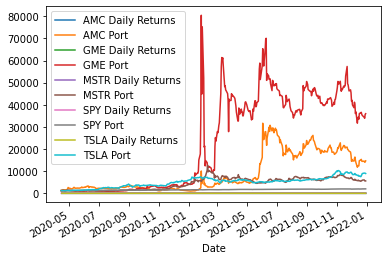

In [62]:
stocks_new.plot()

In [63]:
#Drop 'Daily Returns' column. 
stocks_sliced = stocks_new.iloc[:,[1,3,5,7,9]]
stocks_sliced

,AMC Port,GME Port,MSTR Port,SPY Port,TSLA Port
Date,,,,,
2020-04-15,1220.000000,1220.000000,1220.000000,1168.628517,1220.000000
2020-04-16,1235.186722,1164.440228,1235.225113,1174.266325,1245.709582
2020-04-17,1619.917012,1129.715370,1259.107678,1205.989644,1260.219203
2020-04-20,1609.792531,1298.709677,1262.988581,1184.742539,1247.631914
2020-04-21,1645.228216,1106.565465,1221.094627,1148.769907,1147.936295
...,...,...,...,...,...
2021-12-23,14437.510373,35220.265423,5942.873073,1979.970360,8918.104033
2021-12-27,14528.631212,34333.623825,6053.031382,2007.991207,9143.271040
2021-12-28,14032.530614,33905.352664,5651.903556,2006.350284,9097.552425


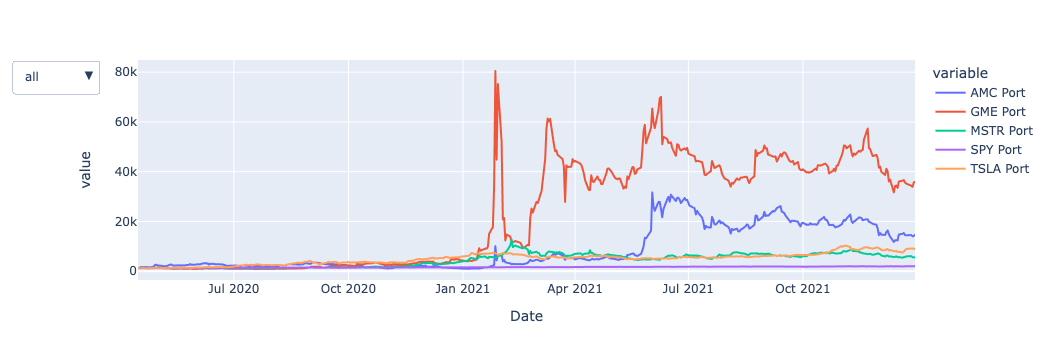

In [71]:
#Build a figure for all series
fig = px.line(stocks_sliced, x=stocks_sliced.index, y = stocks_sliced.columns)
#Map lines/series to groups
maps = {'group 1': ['AMC Port', 'TSLA Port'],
           'group 2':['GME Port', 'MSTR Port', "SPY Port"]}

#Create group and trace visibilites
group = []
vis = []
visList = []
for m in maps.keys():
    for col in stocks_sliced.columns:
        if col in maps[m]:
            vis.append(True)
        else:
            vis.append(False)
    group.append(m)
    visList.append(vis)
    vis = []
    
#Create buttons for each group
buttons = []
for i, g in enumerate(group):
    button =  dict(label=g,
                   method = 'restyle',
                    args = ['visible',visList[i]])
    buttons.append(button)

buttons = [{'label': 'all',
                 'method': 'restyle',
                 'args': ['visible', [True, True, True, True, True, True]]}] + buttons

                     

# update layout with buttons                       
fig.update_layout(
    updatemenus=[
        dict(
        type="dropdown",
        direction="down",
        buttons = buttons)
    ],
)
# buttons
fig.show()